# SetUp

In [1]:
path = '/content/drive/MyDrive/Data/card_trasaction/'
Data = 'Data.csv'

# Problem Description:
**Developed a Credit Card Fraud Detection Model aimed at detecting and reporting fraudulent activities to e-commerce and financial services firms.**

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import joblib,time

import matplotlib.pyplot as plt
import seaborn as sns

from geopy.distance import geodesic
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,roc_curve,roc_auc_score,f1_score
import xgboost as xgb
from catboost import CatBoostClassifier, Pool, cv
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [3]:
# loading Credit Card Transactions Data
df = pd.read_csv(path+Data)

# Data Preprocessing

## Exploratory Data Analysis

In [4]:
print("{0} Transaction to Train ".format(df.shape[0]))
print("{0} features in Data ".format(df.shape[1]))


1370568 Transaction to Train 
22 features in Data 


In [5]:
# Explore Data
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [6]:
# feature sets
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
# extract information about missing records and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370568 entries, 0 to 1370567
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1370568 non-null  object 
 1   cc_num                 1370568 non-null  int64  
 2   merchant               1370568 non-null  object 
 3   category               1370568 non-null  object 
 4   amt                    1370568 non-null  float64
 5   first                  1370568 non-null  object 
 6   last                   1370568 non-null  object 
 7   gender                 1370568 non-null  object 
 8   street                 1370568 non-null  object 
 9   city                   1370568 non-null  object 
 10  state                  1370568 non-null  object 
 11  zip                    1370568 non-null  int64  
 12  lat                    1370568 non-null  float64
 13  long                   1370568 non-null  float64
 14  city_pop          

## Handle Missing Records

In [8]:
# Calculate the median latitude for each category of the "merchant" column
median_lat_by_merchant = df.groupby('merchant')['merch_lat'].median()

# Fill null values in "merch_lat" column based on the median latitude of each category
df['merch_lat'] = df.apply(lambda x: median_lat_by_merchant[x['merchant']] if pd.isnull(x['merch_lat']) else x['merch_lat'], axis=1)

In [9]:
# Calculate the median latitude for each category of the "merchant" column
median_lat_by_merchant = df.groupby('merchant')['merch_long'].median()

# Fill null values in "merch_long" column based on the median of each category
df['merch_long'] = df.apply(lambda x: median_lat_by_merchant[x['merchant']] if pd.isnull(x['merch_long']) else x['merch_long'], axis=1)

In [10]:
# Calculate the median latitude for each category of the "merchant" column
median_lat_by_merchant = df['unix_time'].median()

# Fill null values in "unix_time" column based on the median
df['unix_time'] = df['unix_time'].fillna(median_lat_by_merchant)

In [11]:
# Fill null values in "is_fraud" column
df['is_fraud'] = df['is_fraud'].fillna(0)

## Handle Data Inconsistency

In [12]:
# Convert trans_date_trans_time Object datatype to DateTime type
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Convert dob Object datatype to DateTime type
df['dob'] = pd.to_datetime(df['dob'])

In [13]:
print("we have transaction from {0} to {1}".format(df['trans_date_trans_time'].min(),df['trans_date_trans_time'].max()))

we have transaction from 2019-01-01 00:00:18 to 2020-07-16 23:37:57


We possess over 1.3 million transactions that occurred between 1st January 2019 to 16th July 2020 with 22 features.

In [14]:
# identify Transactions categories ratio

# Get the counts of unique values
value_counts = df.is_fraud.value_counts()

# Calculate the percentages
percentages = df.is_fraud.value_counts(normalize=True) * 100

# Combine counts and percentages into a DataFrame
result = pd.DataFrame({'Count': value_counts, 'Percentage': percentages})

# Print the result
print(result)

       Count  Percentage
0.0  1362781   99.431841
1.0     7787    0.568159


There are around 13,62,780 normal transactions
and only 7787 which is 0.57% are fraudulent.

## Feature Selection

<Axes: >

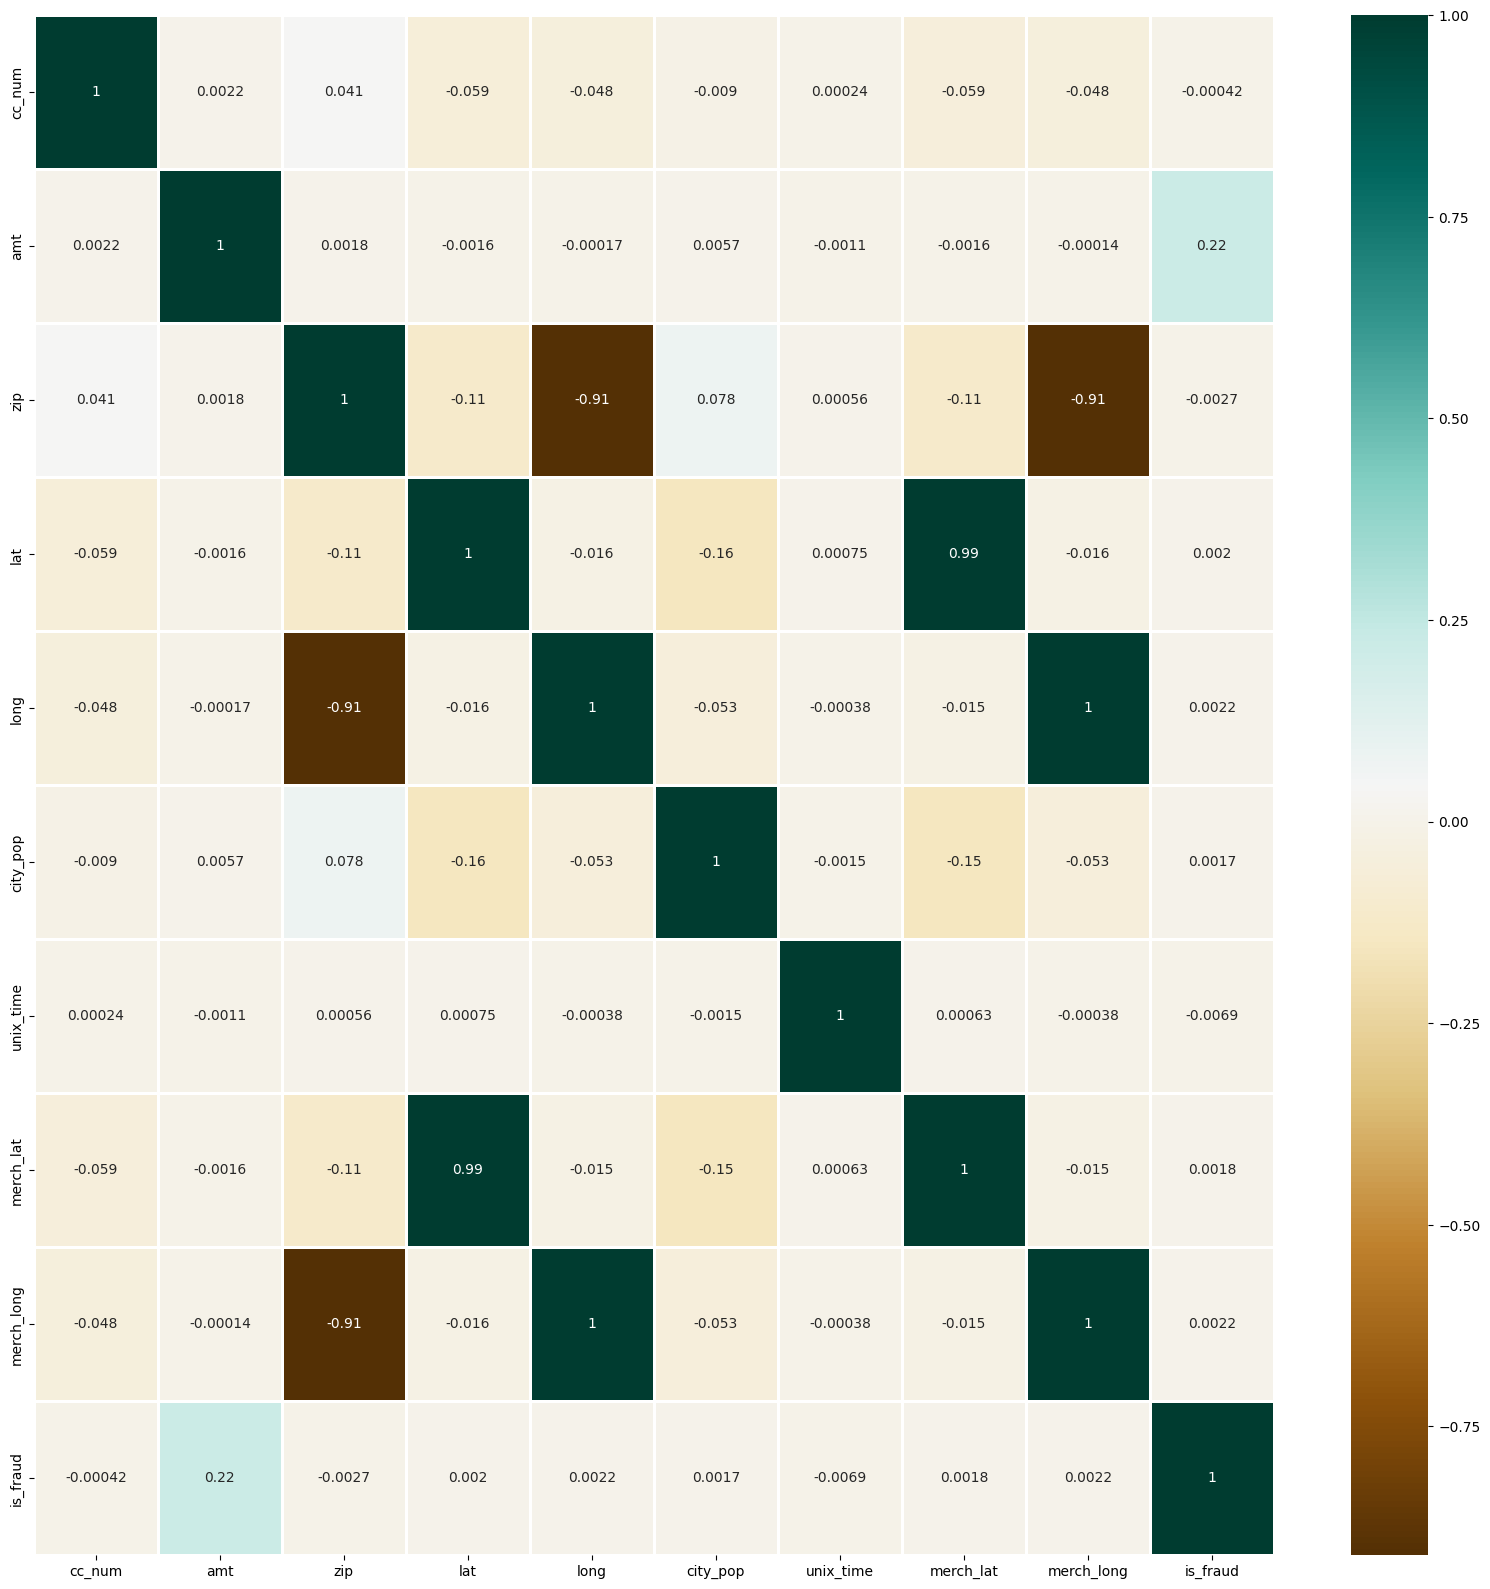

In [15]:
# Finding out the correlation between the features
corr = df.corr()
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap = 'BrBG', linecolor = 'white', linewidth = 1, annot=True)

In [16]:
# remove first and last name feature from data
"""
'first' and 'last': customer identity feature
'street': street name is unique for credit card
'zip': zip code is unique for customer address
"""
df = df.drop(['first','last','trans_num','street','zip','cc_num','city_pop'],axis=1)

## Data Visualization

We have 693 Merchants' Data


array(['kohler, lindgren and koelpin', 'heller-abshire',
       'swift, bradtke and marquardt', 'larson, quitzon and spencer',
       'kilback, nitzsche and leffler', 'jakubowski group',
       'breitenberg llc', 'collier inc', 'paucek-wiza', 'kessler group'],
      dtype=object)

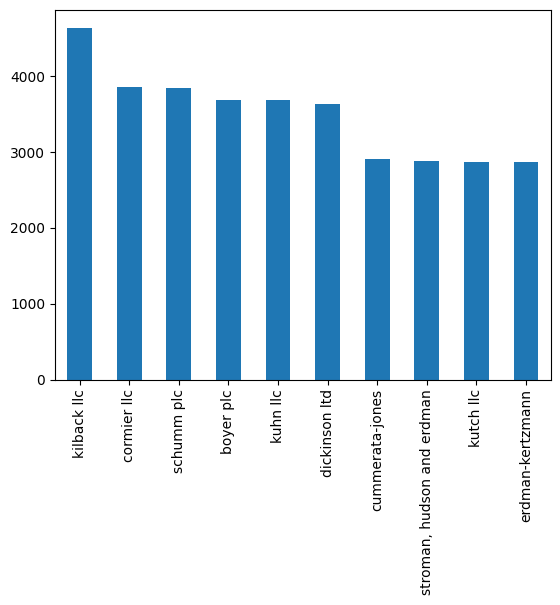

In [17]:
# explore merchants
df.merchant = df.merchant.str.lower().replace('fraud_', '', regex=True)

merchants = df.merchant.value_counts()
number_of_merchants = df.merchant.unique()

print("We have {0} Merchants' Data".format(len(number_of_merchants)))

# Top 10 merchants
merchants[:10].plot(kind='bar')

number_of_merchants[-10:]

we have 14 transaction's categories


<Axes: >

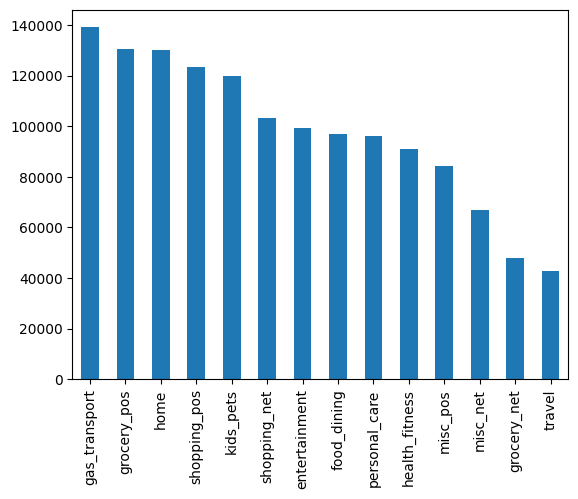

In [18]:
# exploring transaction's category
print("we have {0} transaction's categories".format(len(df.category.unique())))
categories = df.category.value_counts()
categories.plot(kind='bar')

In [19]:
# exploring transaction's amount
print("The Minimum {0} transaction is done by credit card".format(df.amt.min()))
print("The Maximum {0} transaction is done by credit card".format(df.amt.max()))

The Minimum 1.0 transaction is done by credit card
The Maximum 28948.9 transaction is done by credit card


We have 693 different Merchants Data and 14 transaction's categories to train the model.
Customer pay for minimum 1 pound and maximum 28948 pounds through the credit card payment.

F    54.754233
M    45.245767
Name: gender, dtype: float64


<Axes: >

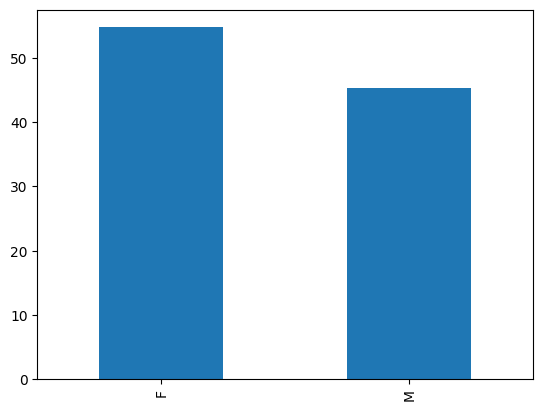

In [20]:
# explore customer gender
gender_ratio = df.gender.value_counts(normalize=True)*100
print(gender_ratio)
(gender_ratio).plot(kind='bar')

F    50.121998
M    49.878002
Name: gender, dtype: float64


<Axes: >

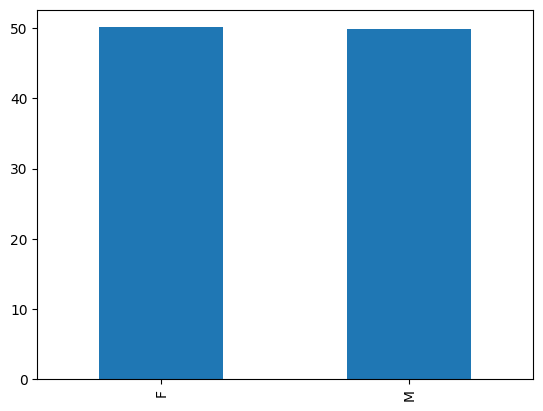

In [21]:
# explore customer gender
gender_ratio = df[df.is_fraud==1].gender.value_counts(normalize=True)*100
print(gender_ratio)
(gender_ratio).plot(kind='bar')

54.75% Female uses credit card for purchase goods and services as compare to 45.24% male. However, 50.12% male got fraud as compare to 49.87% Female.

In [22]:
# Filter the DataFrame to include only fraud cases
fraud_df = df[df['is_fraud'] == 1]

Houston        0.500835
Warren         0.423783
Huntsville     0.372416
Naples         0.372416
Dallas         0.346732
Topeka         0.346732
Tulsa          0.346732
Detroit        0.333890
Utica          0.321048
San Antonio    0.321048
Name: city, dtype: float64


<Axes: >

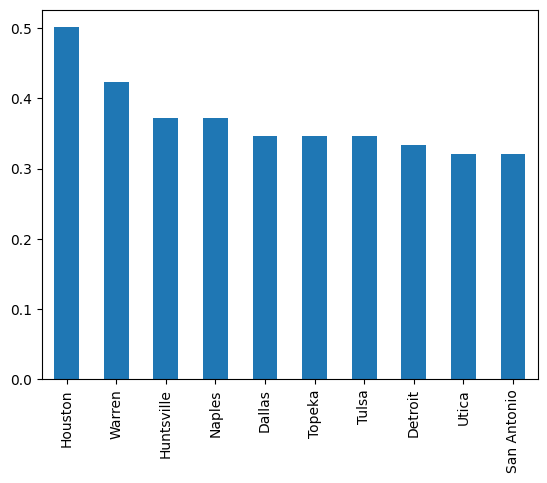

In [23]:
# Examine the top 10 cities with the highest incidence of fraud cases among customers.
city_fraud_ratio = fraud_df.city.value_counts(normalize=True)*100
print(city_fraud_ratio[:10])

(city_fraud_ratio[:10]).plot(kind='bar')

The analysis reveals the prevalence of fraud cases across various cities, with Houston exhibiting the highest incidence rate at 50.08%. Following closely behind are Warren and Huntsville with rates of 42.38% and 37.24% respectively. Notably, several cities including Dallas, Topeka, and Tulsa share a similar rate of 34.67%. Detroit and San Antonio both demonstrate a fraud incidence of approximately 33.39% and 32.10% respectively, while cities like Naples and Utica show slightly lower rates around 37.24% and 32.10%. This analysis provides valuable insights into the distribution of fraud cases among different cities, highlighting areas of heightened risk for fraudulent activity.

NY    7.396944
TX    6.305381
PA    5.881598
OH    4.237832
CA    4.186465
FL    3.762681
IL    3.184795
MI    3.056376
AL    2.889431
MN    2.876589
Name: state, dtype: float64


<Axes: >

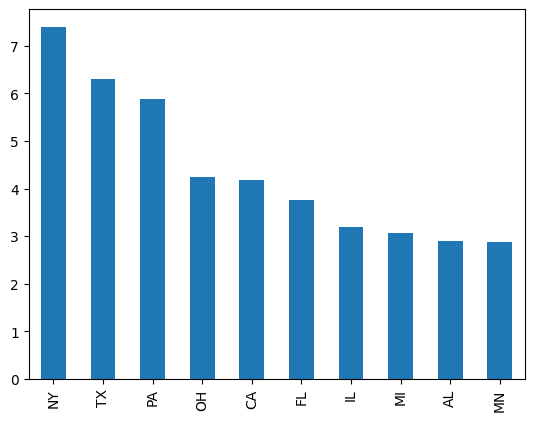

In [24]:
# Examine the top 10 state with the highest incidence of fraud cases among customers.
state_fraud_ratio = fraud_df.state.value_counts(normalize=True)*100
print(state_fraud_ratio[:10])

(state_fraud_ratio[:10]).plot(kind='bar')

The data showcases the distribution of fraud cases by state, with New York (NY) having the highest incidence rate at 7.40%. Texas (TX) follows closely behind with a rate of 6.31%, while Pennsylvania (PA) and Ohio (OH) exhibit rates of 5.88% and 4.24% respectively. California (CA) and Florida (FL) also demonstrate notable rates at 4.19% and 3.76% respectively. Illinois (IL), Michigan (MI), Alabama (AL), and Minnesota (MN) round out the list with rates ranging from 2.88% to 3.18%. This analysis provides insight into the geographical distribution of fraud cases across different states, aiding in the identification of areas with heightened susceptibility to fraudulent activity.

## Feature Engineering

In [25]:
# Calculate age based on current date
current_date = datetime.now()
df['age'] = current_date.year - pd.to_datetime(df['dob']).dt.year
fraud_df['age'] = current_date.year - pd.to_datetime(fraud_df['dob']).dt.year

In [26]:
df['age'].max()

100

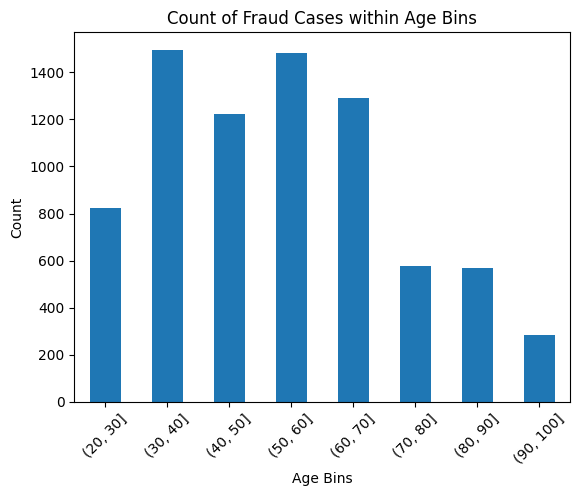

In [27]:
# Define the bins for age
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]  # Define your own bins here

# Bin the ages
fraud_df['age_bins'] = pd.cut(fraud_df['age'], bins=bins)

# Count occurrences of each age bin
age_counts = fraud_df['age_bins'].value_counts().sort_index()

# Plot the bar plot
age_counts.plot(kind='bar')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.title('Count of Fraud Cases within Age Bins')
plt.xticks(rotation=45)
plt.show()

We've noted that the highest percentage of fraud victims fall within the age ranges of "30 to 40" and "50 to 60". Conversely, individuals aged over 75 are less frequently targeted for fraudulent activity.

In [28]:
# Distance between customer address to Merchant address

# Function to calculate distance between two points
def calculate_distance(row):
    merchant_location = (row['merch_lat'], row['merch_long'])
    customer_location = (row['lat'], row['long'])
    return round(geodesic(merchant_location, customer_location).kilometers,2)

# Apply the function to create a new column 'distance'
df['distance_km'] = df.apply(calculate_distance, axis=1)

In [29]:
# Extract various features
df['day'] = df['trans_date_trans_time'].dt.day
df['month'] = df['trans_date_trans_time'].dt.month
df['hour'] = df['trans_date_trans_time'].dt.hour
df['minute'] = df['trans_date_trans_time'].dt.minute
df['second'] = df['trans_date_trans_time'].dt.second
df['dayname'] = df['trans_date_trans_time'].dt.day_name()
df['is_weekend'] = df['trans_date_trans_time'].dt.dayofweek // 5  # 1 for weekend, 0 for weekday
df['is_weekday'] = 1 - df['is_weekend']  # 1 for weekday, 0 for weekend

# Define a list of holidays (you may need to customize this)
holidays = [datetime(2024, 1, 1), datetime(2024, 7, 4)]  # Example: New Year's Day, Independence Day

# Create a holiday indicator column
df['is_holiday'] = df['trans_date_trans_time'].isin(holidays).astype(int)


In [30]:
df = df.drop(['dob','lat','long','merch_lat','merch_long','trans_date_trans_time'],axis=1)

In [31]:
# Data Description
df.describe()


,amt,unix_time,is_fraud,age,distance_km,day,month,hour,minute,second,is_weekend,is_weekday,is_holiday
count,1.370568e+06,1.370568e+06,1.370568e+06,1.370568e+06,1.370568e+06,1.370568e+06,1.370568e+06,1.370568e+06,1.370568e+06,1.370568e+06,1.370568e+06,1.370568e+06,1370568.0
mean,7.027170e+01,1.350519e+09,5.681586e-03,5.072950e+01,7.610904e+01,1.559138e+01,6.166469e+00,1.281040e+01,2.949908e+01,2.949617e+01,3.436072e-01,6.563928e-01,0.0
std,1.594103e+02,1.358553e+07,7.516189e-02,1.737875e+01,2.909653e+01,8.851345e+00,3.327811e+00,6.815859e+00,1.732151e+01,1.731362e+01,4.749120e-01,4.749120e-01,0.0
min,1.000000e+00,1.325376e+09,0.000000e+00,1.900000e+01,2.000000e-02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,9.650000e+00,1.339333e+09,0.000000e+00,3.700000e+01,5.536000e+01,8.000000e+00,3.000000e+00,7.000000e+00,1.400000e+01,1.500000e+01,0.000000e+00,0.000000e+00,0.0
50%,4.749000e+01,1.350672e+09,0.000000e+00,4.900000e+01,7.826000e+01,1.500000e+01,6.000000e+00,1.400000e+01,3.000000e+01,3.000000e+01,0.000000e+00,1.000000e+00,0.0
75%,8.311000e+01,1.362196e+09,0.000000e+00,6.200000e+01,9.846000e+01,2.300000e+01,9.000000e+00,1.900000e+01,4.400000e+01,4.400000e+01,1.000000e+00,1.000000e+00,0.0
max,2.894890e+04,1.374018e+09,1.000000e+00,1.000000e+02,8.985100e+02,3.100000e+01,1.200000e+01,2.300000e+01,5.900000e+01,5.900000e+01,1.000000e+00,1.000000e+00,0.0


In [32]:
df.duplicated().sum()

0

In [33]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'job',
       'unix_time', 'is_fraud', 'age', 'distance_km', 'day', 'month', 'hour',
       'minute', 'second', 'dayname', 'is_weekend', 'is_weekday',
       'is_holiday'],
      dtype='object')

In [34]:
df.dtypes

merchant        object
category        object
amt            float64
gender          object
city            object
state           object
job             object
unix_time      float64
is_fraud       float64
age              int64
distance_km    float64
day              int64
month            int64
hour             int64
minute           int64
second           int64
dayname         object
is_weekend       int64
is_weekday       int64
is_holiday       int64
dtype: object

## Data Encoding

In [35]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding for 'merchant', 'category', 'gender', 'city', 'state', and 'job' columns
for column in ['merchant', 'category', 'gender', 'city', 'state', 'job','dayname']:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

In [36]:
features = ['amt','unix_time','distance_km']

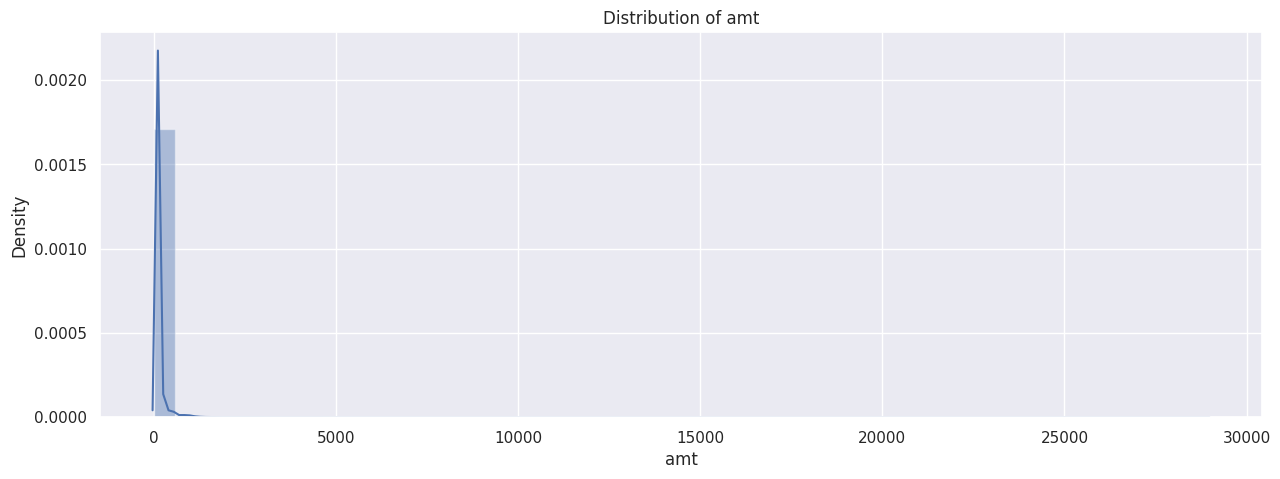

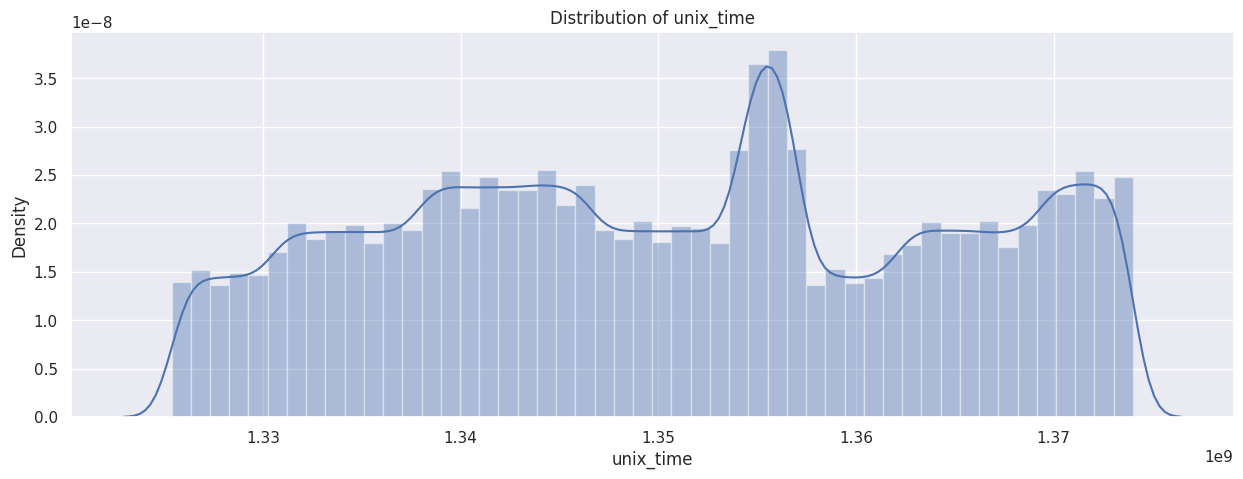

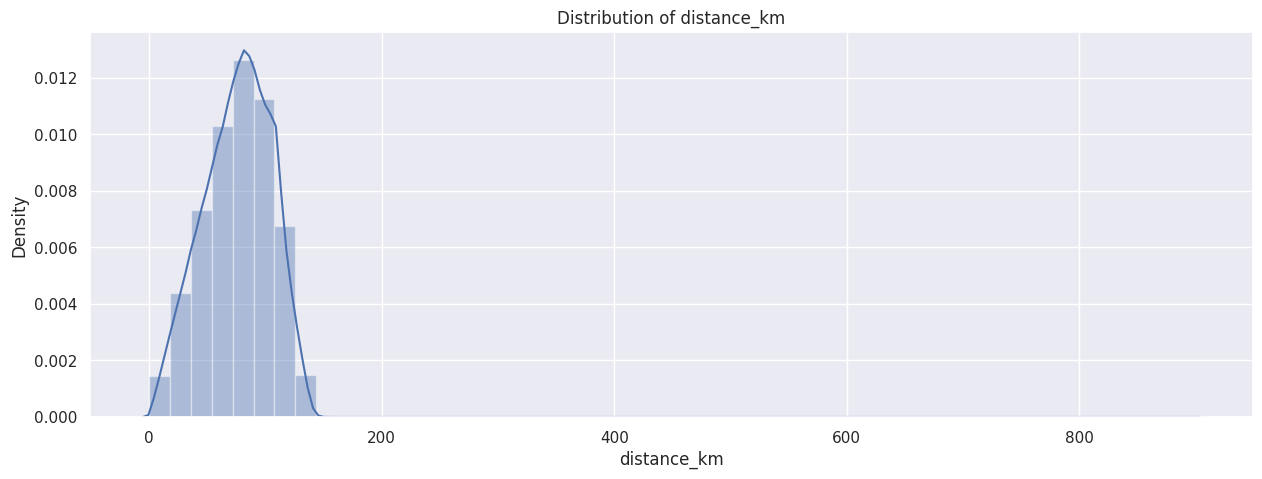

In [37]:
#Explore Feature Distribution
for column in features:
    sns.set(rc={'figure.figsize':(15,5)})
    sns.distplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

In [38]:
# Define a threshold for identifying outliers (e.g., z-score > 3 or z-score < -3)
threshold = 3

# Create an empty DataFrame to store outlier flags
outliers = pd.DataFrame()

# Iterate over each numeric feature
for column in features:
    # Calculate z-scores for the current feature
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    # Identify outliers based on the threshold
    outliers[column] = abs(z_scores) > threshold

# Print outliers
print("Outliers:")
print(outliers.sum())

Outliers:
amt            13539
unix_time          0
distance_km        1
dtype: int64


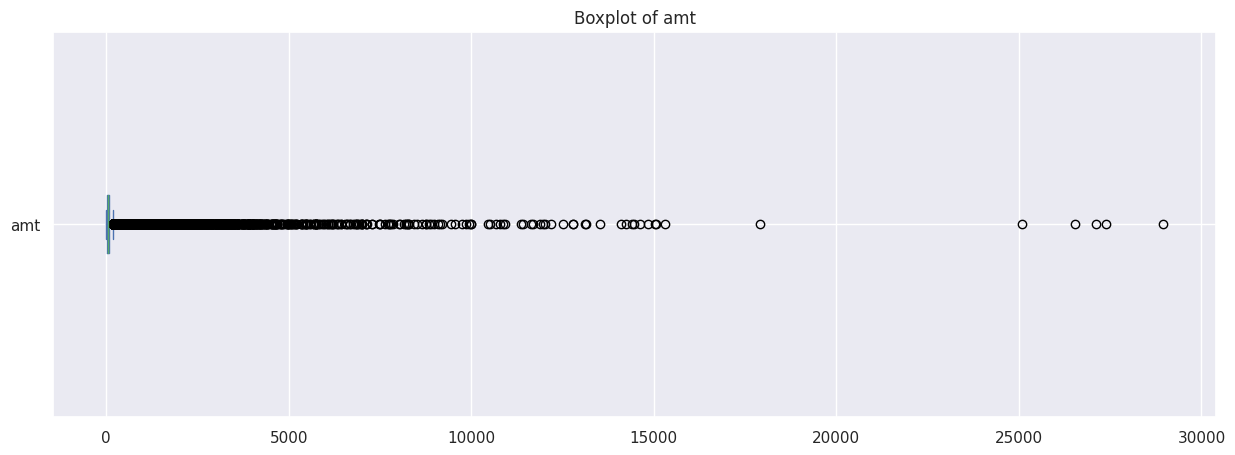

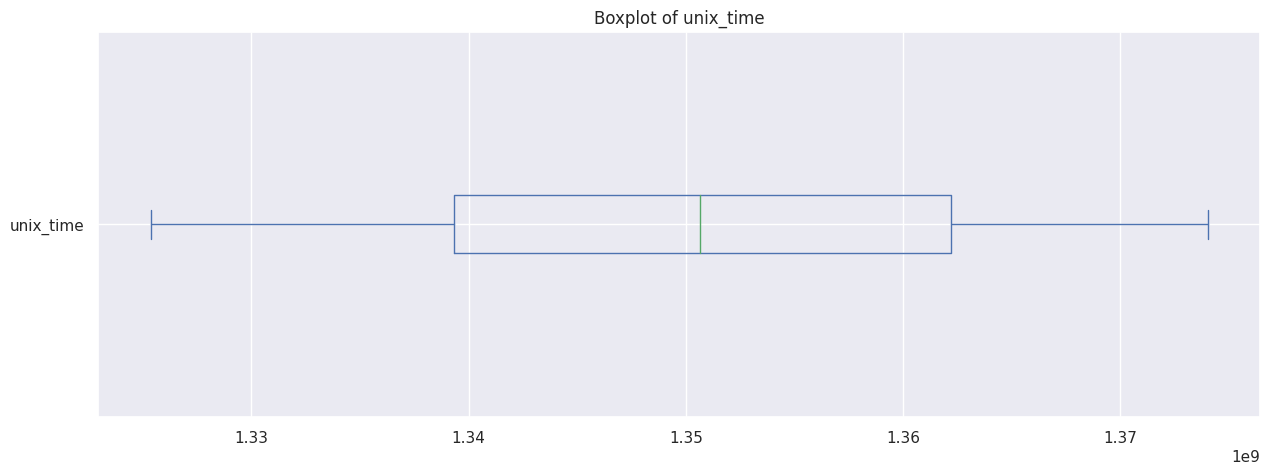

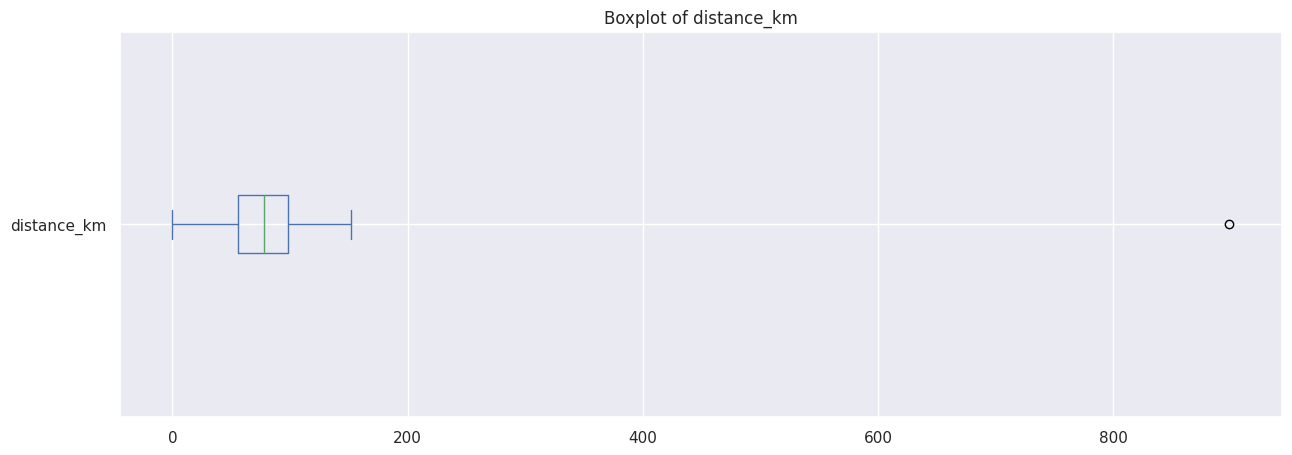

In [39]:
# Create a boxplot
for col in features:
    df[col].plot(kind='box', vert=False)
    plt.title(f'Boxplot of {col}')
    plt.show()

## Handle Outliers

<Axes: >

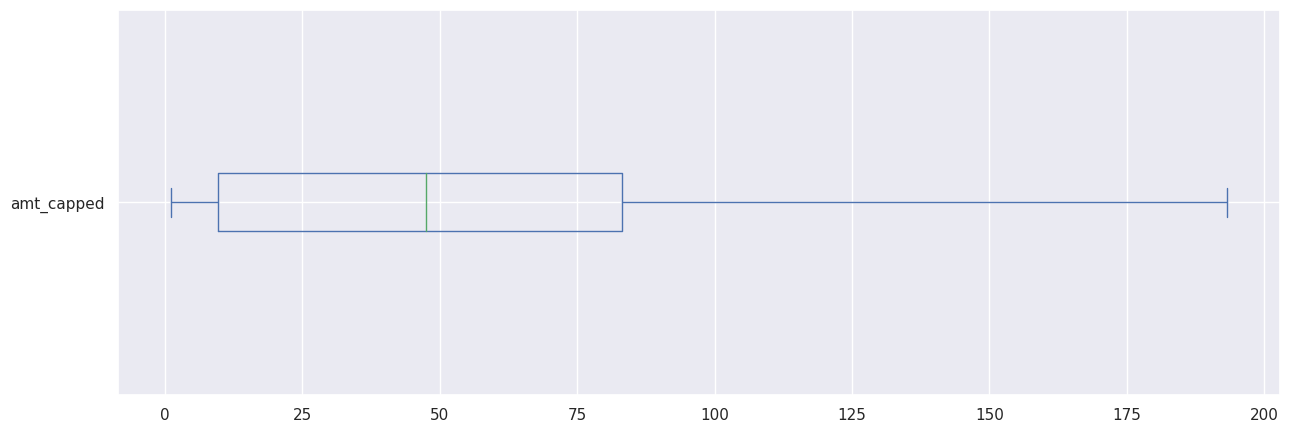

In [40]:
# Calculate the interquartile range (IQR) for 'amt' feature
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['amt_capped'] = df['amt'].clip(lower=lower_bound, upper=upper_bound)
df['amt_capped'].plot(kind='box', vert=False)


<Axes: >

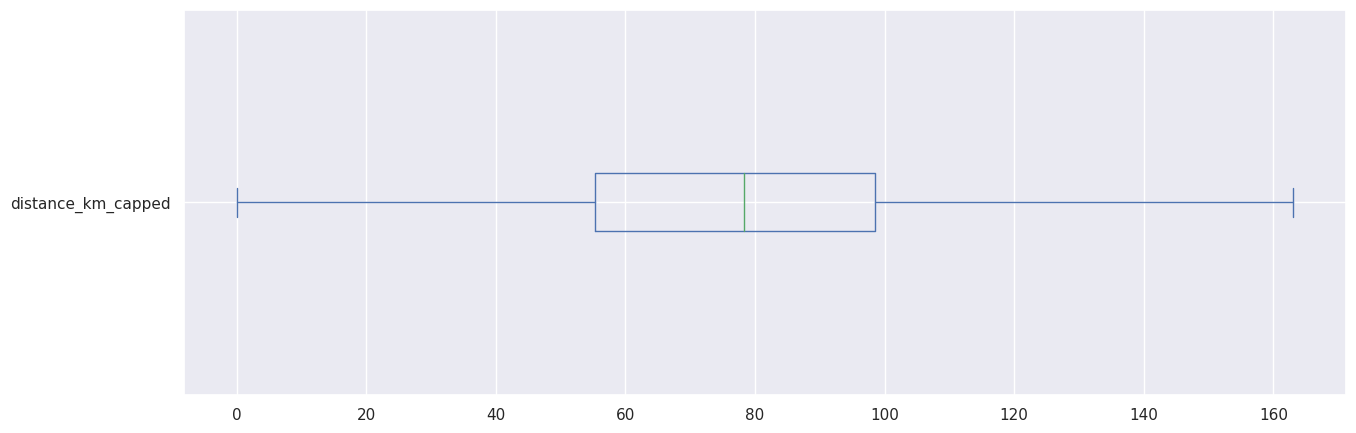

In [41]:
# Calculate the interquartile range (IQR) for 'distance_km' feature
Q1 = df['distance_km'].quantile(0.25)
Q3 = df['distance_km'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['distance_km_capped'] = df['distance_km'].clip(lower=lower_bound, upper=upper_bound)
df['distance_km_capped'].plot(kind='box', vert=False)


In [42]:
df.columns.values

array(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'job',
       'unix_time', 'is_fraud', 'age', 'distance_km', 'day', 'month',
       'hour', 'minute', 'second', 'dayname', 'is_weekend', 'is_weekday',
       'is_holiday', 'merchant_encoded', 'category_encoded',
       'gender_encoded', 'city_encoded', 'state_encoded', 'job_encoded',
       'dayname_encoded', 'amt_capped', 'distance_km_capped'],
      dtype=object)

## Handle Imbalanced Data


In [43]:
# Apply undersampling
# Count the number of samples in each class
class_counts = df['is_fraud'].value_counts()

# Find the minority class label
minority_class = class_counts.idxmin()

# Find the number of samples in the minority class
minority_count = class_counts[minority_class]

# Find the number of samples in the majority class
majority_class = class_counts.idxmax()

# Sample the majority class to match the number of samples in the minority class
majority_sampled = df[df['is_fraud'] == majority_class].sample(n=minority_count, replace=False, random_state=42)

# Combine minority class samples with the sampled majority class samples
undersampled_data = pd.concat([majority_sampled, df[df['is_fraud'] == minority_class]])

# Shuffle the undersampled data
undersampled_data = undersampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [44]:
undersampled_data.shape

(15574, 29)

# Model Building

## Define Model Evaluation Metric

In [46]:
def PerformanceMetric(Model,X_train,X_test,y_train,y_test,y_pred):
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    print('Testing Accuracy:', round(accuracy*100,2),'%')
    print('Testing Precision:', round(precision*100,2),'%')
    print('Testing Recall:', round(recall*100,2),'%')
    print('Testing F1 Score:', round(f1*100,2),'%')

    #ROC curve
    fpr, tpr,threshold = roc_curve(y_test,y_pred)
    y_pred - np.rint(y_pred)

    #ROC AUC Curve
    roc_auc = roc_auc_score(y_test,y_pred)
    plt.figure(figsize=(15,5))
    plt.plot(fpr,tpr,label='(area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

    #confusion metrix
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(15,5))
    plt.title("Confusion Matrix")
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    plt.show()

    return accuracy,precision,recall,f1


In [47]:
PerformanceResults = []

## Define Independent and Dependent Features

In [48]:
X = undersampled_data[['day', 'month', 'hour', 'minute', 'second', 'dayname_encoded',
        'merchant_encoded', 'category_encoded', 'amt_capped',
        'gender_encoded', 'city_encoded', 'state_encoded',
       'job_encoded', 'unix_time', 'age', 'distance_km_capped']]

y = undersampled_data[['is_fraud']]

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets
print("Shapes of training and testing sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shapes of training and testing sets:
X_train: (10901, 16)
X_test: (4673, 16)
y_train: (10901, 1)
y_test: (4673, 1)


In [53]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Selection

### Random Forest

In [54]:
# grid searching key hyperparameters for RandomForestClassifier
Start_time= time.time()

# define models and parameters
RF = RandomForestClassifier()
n_estimators = [5,10,15]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

RF_random_search = GridSearchCV(estimator=RF, param_grid=grid, cv=5, scoring='roc_auc')
RF_random_result = RF_random_search.fit(X_train_scaled, y_train)

# summarize results
print("Best: %f using %s" % (RF_random_result.best_score_, RF_random_result.best_params_))

# check recall on test set
y_val_predict = RF_random_result.predict(X_test_scaled)

Best: 0.984230 using {'max_features': 'log2', 'n_estimators': 15}


Testing Accuracy: 95.21 %
Testing Precision: 95.07 %
Testing Recall: 95.32 %
Testing F1 Score: 95.2 %


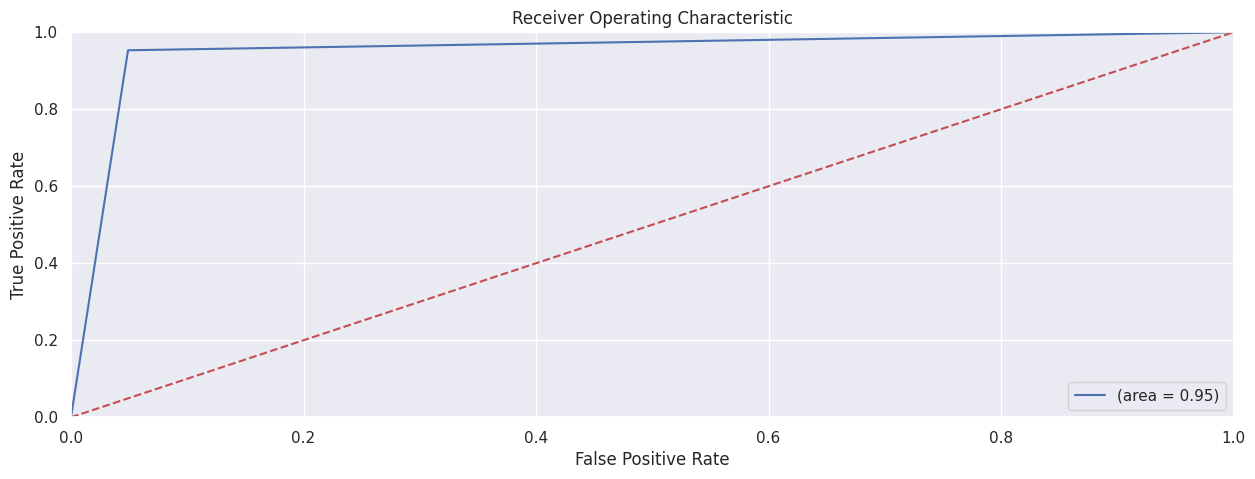

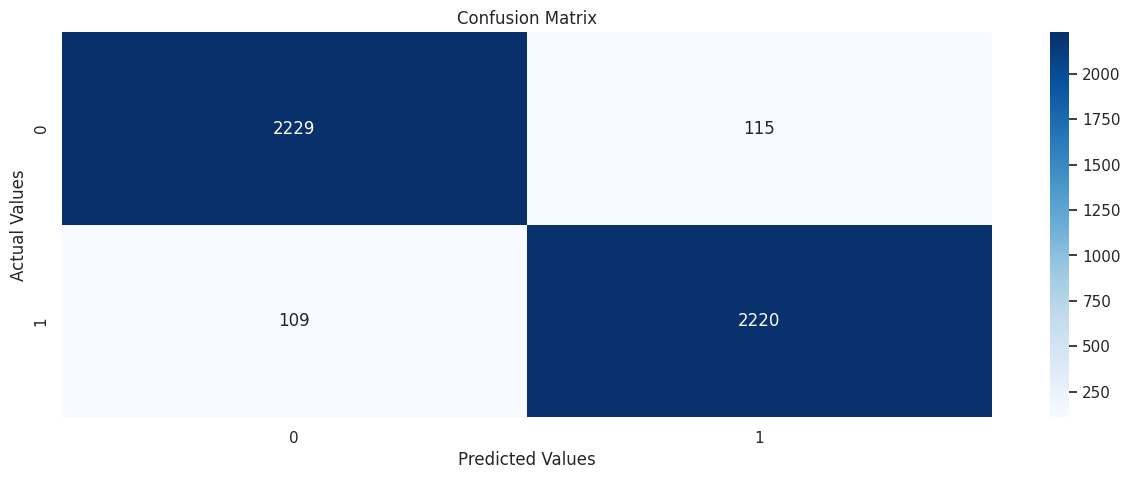

Model Train Time Taken: 13.729105949401855


In [55]:
accuracy,precision,recall,f1 = PerformanceMetric(RF_random_search,X_train,X_test,y_train,y_test,y_val_predict)
print('Model Train Time Taken:',time.time()-Start_time)
PerformanceResults.append(['Random Forest Classifier',accuracy,precision,recall,f1,time.time()-Start_time])

### XGBoost

In [56]:
#grid searching key hyperparameters for GradientBoostingClassifier
Start_time = time.time()

# define models and parameters
XGB = xgb.XGBClassifier()

# A parameter grid for XGBoost
grid = {"learning_rate": (0.01, 0.1),
        'min_child_weight': [1, 5, 10],
        'gamma': [ 0.0, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [ 0.3, 0.4],
        'max_depth': [3, 4, 5]
        }

# define grid search
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
XGB_random_search = GridSearchCV(estimator=XGB, param_grid=grid, cv=5, scoring='roc_auc')
XGB_random_result = XGB_random_search.fit(X_train_scaled, y_train)

# summarize results
print("Best: %f using %s" % (XGB_random_result.best_score_, XGB_random_result.best_params_))

# check recall on test set
y_val_predict = XGB_random_result.predict(X_test_scaled)

Best: 0.991812 using {'colsample_bytree': 0.4, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 1.0}


Testing Accuracy: 96.08 %
Testing Precision: 95.39 %
Testing Recall: 96.82 %
Testing F1 Score: 96.1 %


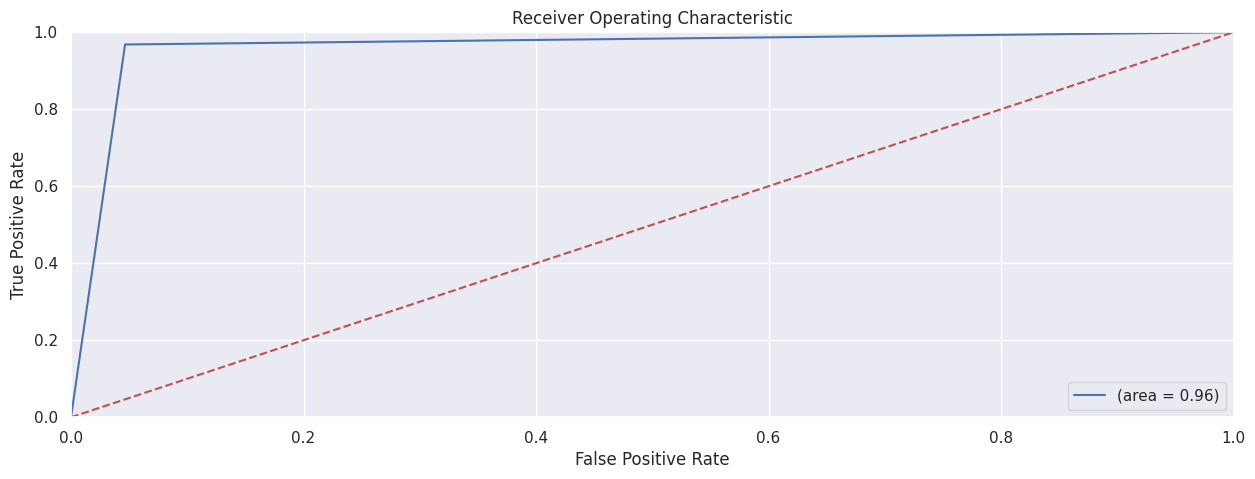

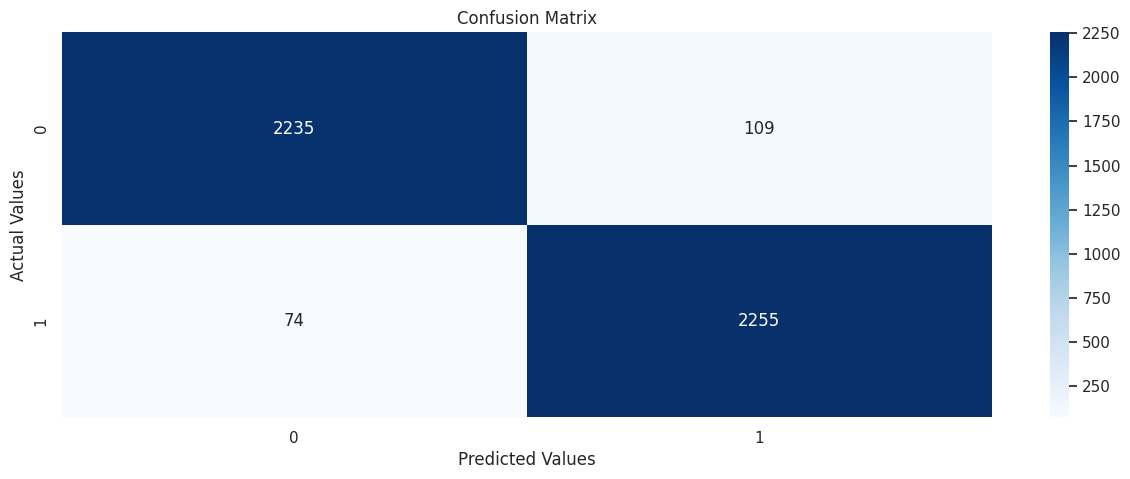

Model Train Time Taken: 403.3053603172302


In [57]:
accuracy,precision,recall,f1 = PerformanceMetric(XGB_random_search,X_train,X_test,y_train,y_test,y_val_predict)
print('Model Train Time Taken:',time.time()-Start_time)
PerformanceResults.append(['XGBoost Classifier',accuracy,precision,recall,f1,time.time()-Start_time])

### CatBoosting Classifier

In [58]:

#grid searching key hyperparameters for CatBoostingClassifier
Start_time = time.time()

#Instantiate CatBoostClassifier
catboost_classifier = CatBoostClassifier()

#create the grid
grid = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}

# define grid search
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
CB_random_search = GridSearchCV(estimator=catboost_classifier, param_grid=grid, cv=5, scoring='roc_auc')
CB_random_result = CB_random_search.fit(X_train_scaled, y_train)

# summarize results
print("Best: %f using %s" % (CB_random_result.best_score_, CB_random_result.best_params_))

# check recall on test set
y_val_predict = CB_random_result.predict(X_test_scaled)



Streaming output truncated to the last 5000 lines.
22:	learn: 0.1902876	total: 94.4ms	remaining: 726ms
23:	learn: 0.1879305	total: 98.2ms	remaining: 720ms
24:	learn: 0.1865093	total: 103ms	remaining: 724ms
25:	learn: 0.1842748	total: 107ms	remaining: 717ms
26:	learn: 0.1830293	total: 111ms	remaining: 710ms
27:	learn: 0.1824529	total: 115ms	remaining: 705ms
28:	learn: 0.1812613	total: 121ms	remaining: 714ms
29:	learn: 0.1785637	total: 130ms	remaining: 736ms
30:	learn: 0.1780783	total: 140ms	remaining: 763ms
31:	learn: 0.1776598	total: 150ms	remaining: 787ms
32:	learn: 0.1760736	total: 154ms	remaining: 777ms
33:	learn: 0.1750365	total: 157ms	remaining: 767ms
34:	learn: 0.1733158	total: 160ms	remaining: 756ms
35:	learn: 0.1722779	total: 164ms	remaining: 748ms
36:	learn: 0.1717977	total: 168ms	remaining: 739ms
37:	learn: 0.1703407	total: 172ms	remaining: 731ms
38:	learn: 0.1698600	total: 175ms	remaining: 722ms
39:	learn: 0.1683669	total: 178ms	remaining: 714ms
40:	learn: 0.1668158	total: 1

Testing Accuracy: 96.64 %
Testing Precision: 96.02 %
Testing Recall: 97.29 %
Testing F1 Score: 96.65 %


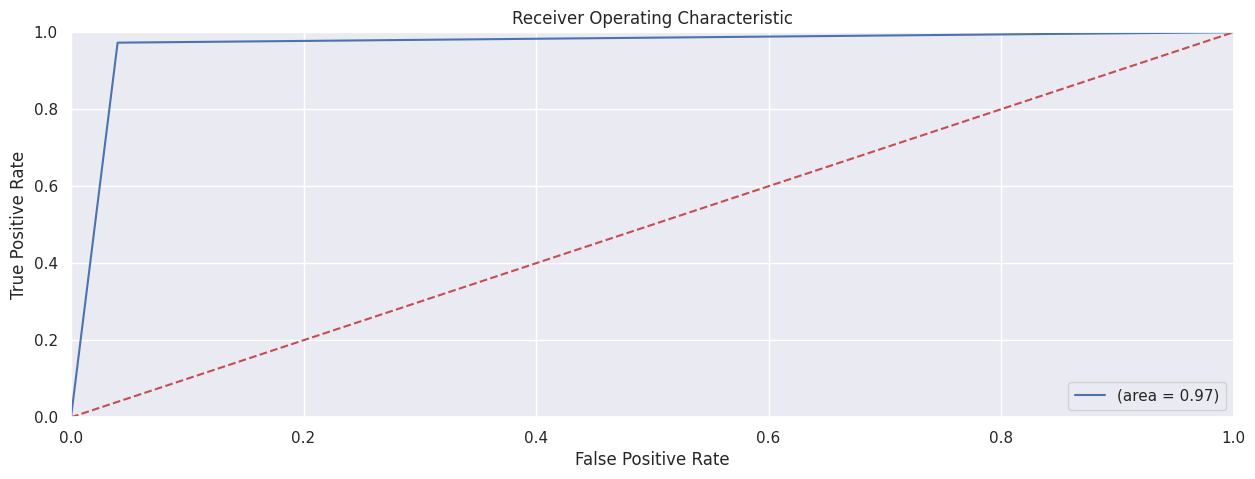

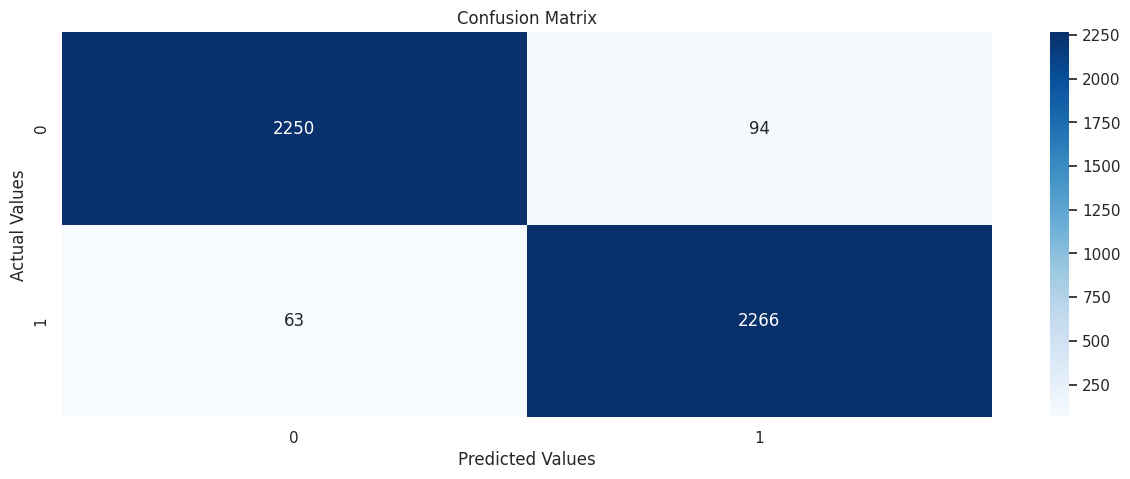

Model Train Time Taken: 54.743041038513184


In [59]:
accuracy,precision,recall,f1 = PerformanceMetric(CB_random_search,X_train,X_test,y_train,y_test,y_val_predict)
print('Model Train Time Taken:',time.time()-Start_time)
PerformanceResults.append(['CatBoost Classifier',accuracy,precision,recall,f1,time.time()-Start_time])

# Light Graident Boosting Classifier

In [60]:
#grid searching key hyperparameters for Light Graident BoostingClassifier
Start_time = time.time()

# define models and parameters
lgb_classifier = lgb.LGBMClassifier()

# A parameter grid for Light GBBoost
grid = {"learning_rate": (0.001, 0.01, 0.1),
        'min_child_weight': [1, 5, 10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [ 0.3, 0.4],
        'max_depth': [3, 4, 5]
        }

# define grid search
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
LGB_random_search = RandomizedSearchCV(estimator=lgb_classifier, param_distributions=grid, n_iter=3, cv=5, scoring='roc_auc', random_state=42)
LGB_random_result = LGB_random_search.fit(X_train_scaled, y_train)

# summarize results
print("Best: %f using %s" % (LGB_random_result.best_score_, LGB_random_result.best_params_))

# check recall on test set
y_val_predict = LGB_random_result.predict(X_test_scaled)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 4366, number of negative: 4354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1877
[LightGBM] [Info] Number of data points in the train set: 8720, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500688 -> initscore=0.002752
[LightGBM] [Info] Start training from score 0.002752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

Testing Accuracy: 95.21 %
Testing Precision: 94.39 %
Testing Recall: 96.09 %
Testing F1 Score: 95.23 %


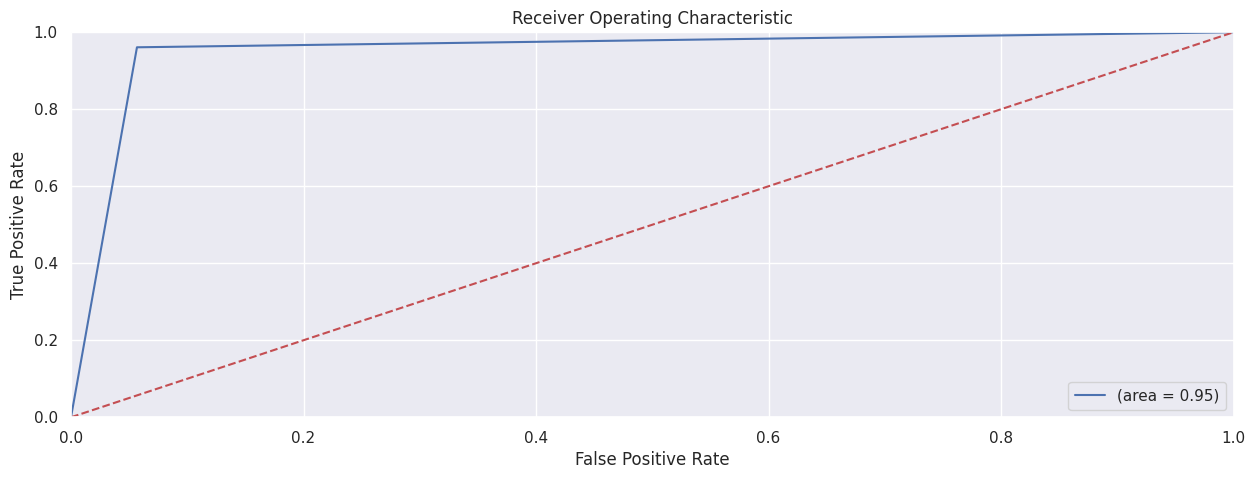

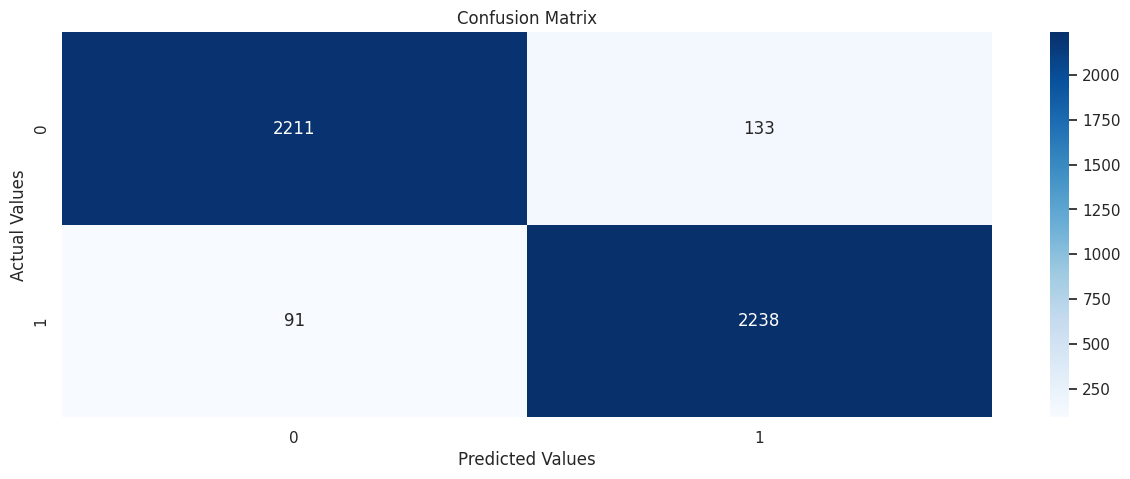

Model Train Time Taken: 4.485792398452759


In [61]:
accuracy,precision,recall,f1 = PerformanceMetric(LGB_random_search,X_train,X_test,y_train,y_test,y_val_predict)
print('Model Train Time Taken:',time.time()-Start_time)
PerformanceResults.append(['Light GBoost Classifier',accuracy,precision,recall,f1,time.time()-Start_time])

# Model Evaluation

In [62]:
Report = pd.DataFrame(PerformanceResults,columns=['Model','Accuracy','Precision','Recall','F1Score','TrainingTime'])
Report

,Model,Accuracy,Precision,Recall,F1Score,TrainingTime
0,Random Forest Classifier,0.952065,0.950749,0.953199,0.951973,13.730684
1,XGBoost Classifier,0.960839,0.953892,0.968227,0.961006,403.305580
2,CatBoost Classifier,0.966403,0.960169,0.972950,0.966517,54.744622
3,Light GBoost Classifier,0.952065,0.943906,0.960927,0.952340,4.487799


## Model Assessment

In [63]:
joblib.dump(CB_random_search,'credit_card_fraud_detection.pkl')


['credit_card_fraud_detection.pkl']